In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


LOADING AND DISPLAYING THE DATASETS

In [2]:
# Loading the datasets
project_data = pd.read_csv('/content/Project_Level_Data - Project_Level_Data.csv')
gene_drug_data = pd.read_csv('/content/Gene_Drug_Adverse_Event_Relationships - Gene_Drug_Adverse_Event_Relationships.csv')
compound_activity_data = pd.read_csv('/content/Compound_Off_Target_Activity - Compound_Off_Target_Activity.csv')


In [4]:
# Displaying the first few rows of each dataset to understand their structure

print("\nCompound Off Target Activity:")
compound_activity_data.shape



Compound Off Target Activity:


(26358, 3)

In [5]:
compound_activity_data.head()

,CompoundID,Gene Target,pIC50
0,CM-212452,Abl,5.50
1,CM-212452,ACVR1,5.33
2,CM-212452,Akt1,5.39
3,CM-212452,ALK,5.32
4,CM-212452,Aurora1,5.26


In [6]:
print("Project Level Data:")
project_data.head()


Project Level Data:


,CompoundID,Primary_Target_Assay,Primary_Target_Assay_BioActivity,MW,Molecular_Weight,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,Num_AromaticRings,F_SP3,Drug_Class,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)"
0,CM-1622017,JAK1 EC50(uM),0.259,389.45,NaN,79.59,3.586,3.5863,1,7,3.0,0.36364,UNKNOWN,41.7,86.7,NaN,NaN,3.24
1,CM-1749952,JAK1 EC50(uM),0.312,461.99,NaN,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN
2,CM-1749952,JAK1 EC50(uM),0.312,461.99,NaN,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN
3,CM-1749702,JAK1 EC50(uM),3.000,386.49,NaN,97.12,1.995,1.9948,3,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN
4,CM-1749701,JAK1 EC50(uM),3.000,385.51,NaN,80.13,2.524,1.7222,2,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN


In [7]:
project_data.shape

(2452, 18)

In [8]:

print("\nGene Drug Adverse Event Relationships:")
gene_drug_data.head()


Gene Drug Adverse Event Relationships:


,GeneSymbol,Ensembl ID,EntrezGene,ae,thresholdset,gene_count,drug_count,ae_count,drugs_with_ae,bioactive_drugs
0,CSF1R,ENSG00000182578,NaN,Platelet count abnormal,11,3175,4905,2381,53,144
1,CSF1R,ENSG00000182578,NaN,Urine output decreased,11,3175,4905,2381,137,144
2,CSF1R,ENSG00000182578,NaN,Thermal burn,11,3175,4905,2381,113,144
3,CSF1R,ENSG00000182578,NaN,Oliguria,11,3175,4905,2381,246,144
4,CSF1R,ENSG00000182578,NaN,Hypercholesterolaemia,11,3175,4905,2381,352,144


In [9]:
gene_drug_data.shape

(19449, 10)

# DATA INTEGRATION

**The Datasets Are Merged To Explore The Relationships Between The Variables**

In [10]:
# Rename 'Gene Target' to 'GeneSymbol' in the compound_off_target_activity for consistency in merging
compound_activity_data.rename(columns={'Gene Target': 'GeneSymbol'}, inplace=True)

# Merge compound_off_target_activity with project_level_data on CompoundID
merged_data = pd.merge(compound_activity_data, project_data, on='CompoundID', how='inner')

# Merge the above result with gene_drug_adverse_event_relationships on Gene
final_merged_data = pd.merge(merged_data, gene_drug_data, on='GeneSymbol', how='inner')

# Display the first few rows of the final merged data to check the result
final_merged_data.head()


,CompoundID,GeneSymbol,pIC50,Primary_Target_Assay,Primary_Target_Assay_BioActivity,MW,Molecular_Weight,TPSA,ClogP,LogD,...,"Clint,mic (L/hr/kg) (Rat)",Ensembl ID,EntrezGene,ae,thresholdset,gene_count,drug_count,ae_count,drugs_with_ae,bioactive_drugs
0,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Hepatic lesion,11,3175,4905,2381,74,102
1,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Thrombotic microangiopathy,11,3175,4905,2381,155,102
2,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Full blood count decreased,11,3175,4905,2381,97,102
3,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Gingival pain,11,3175,4905,2381,77,102
4,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Myoclonus,11,3175,4905,2381,268,102


In [11]:
final_merged_data.shape

(6725196, 29)

In [12]:
# For GeneSymbol and EntrezGene, we can drop rows with missing values
final_merged_data = final_merged_data.dropna(subset=['GeneSymbol', 'EntrezGene', 'Ensembl ID'])

# Merging 'MW' and 'Molecular_Weight' into one column 'Molecular_Weight'
final_merged_data['Molecular_Weight'] = final_merged_data['Molecular_Weight'].combine_first(final_merged_data['MW'])

# Dropping the redundant columns that offer no information
final_merged_data = final_merged_data.drop(columns=['MW', 'Primary_Target_Assay', 'ae_count', 'gene_count', 'drug_count', 'thresholdset'])


In [13]:
final_merged_data.head()

,CompoundID,GeneSymbol,pIC50,Primary_Target_Assay_BioActivity,Molecular_Weight,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,...,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)",Ensembl ID,EntrezGene,ae,drugs_with_ae,bioactive_drugs
1492848,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,NaN,NaN,NaN,NaN,NaN,ENSG00000146648,1956.0,Shock haemorrhagic,151,21
1492849,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,NaN,NaN,NaN,NaN,NaN,ENSG00000146648,1956.0,Abdominal pain,1991,21
1492850,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,NaN,NaN,NaN,NaN,NaN,ENSG00000146648,1956.0,Gastrointestinal ulcer,115,151
1492851,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,NaN,NaN,NaN,NaN,NaN,ENSG00000146648,1956.0,Myoclonus,268,21
1492852,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,NaN,NaN,NaN,NaN,NaN,ENSG00000146648,1956.0,Insomnia,1647,8


In [14]:
final_merged_data.shape

(3250496, 23)

# DATA CLEANING AND PREPROCESSING



**Handling Outliers**

**Visualizing The Variables Before Outliers Filtration**

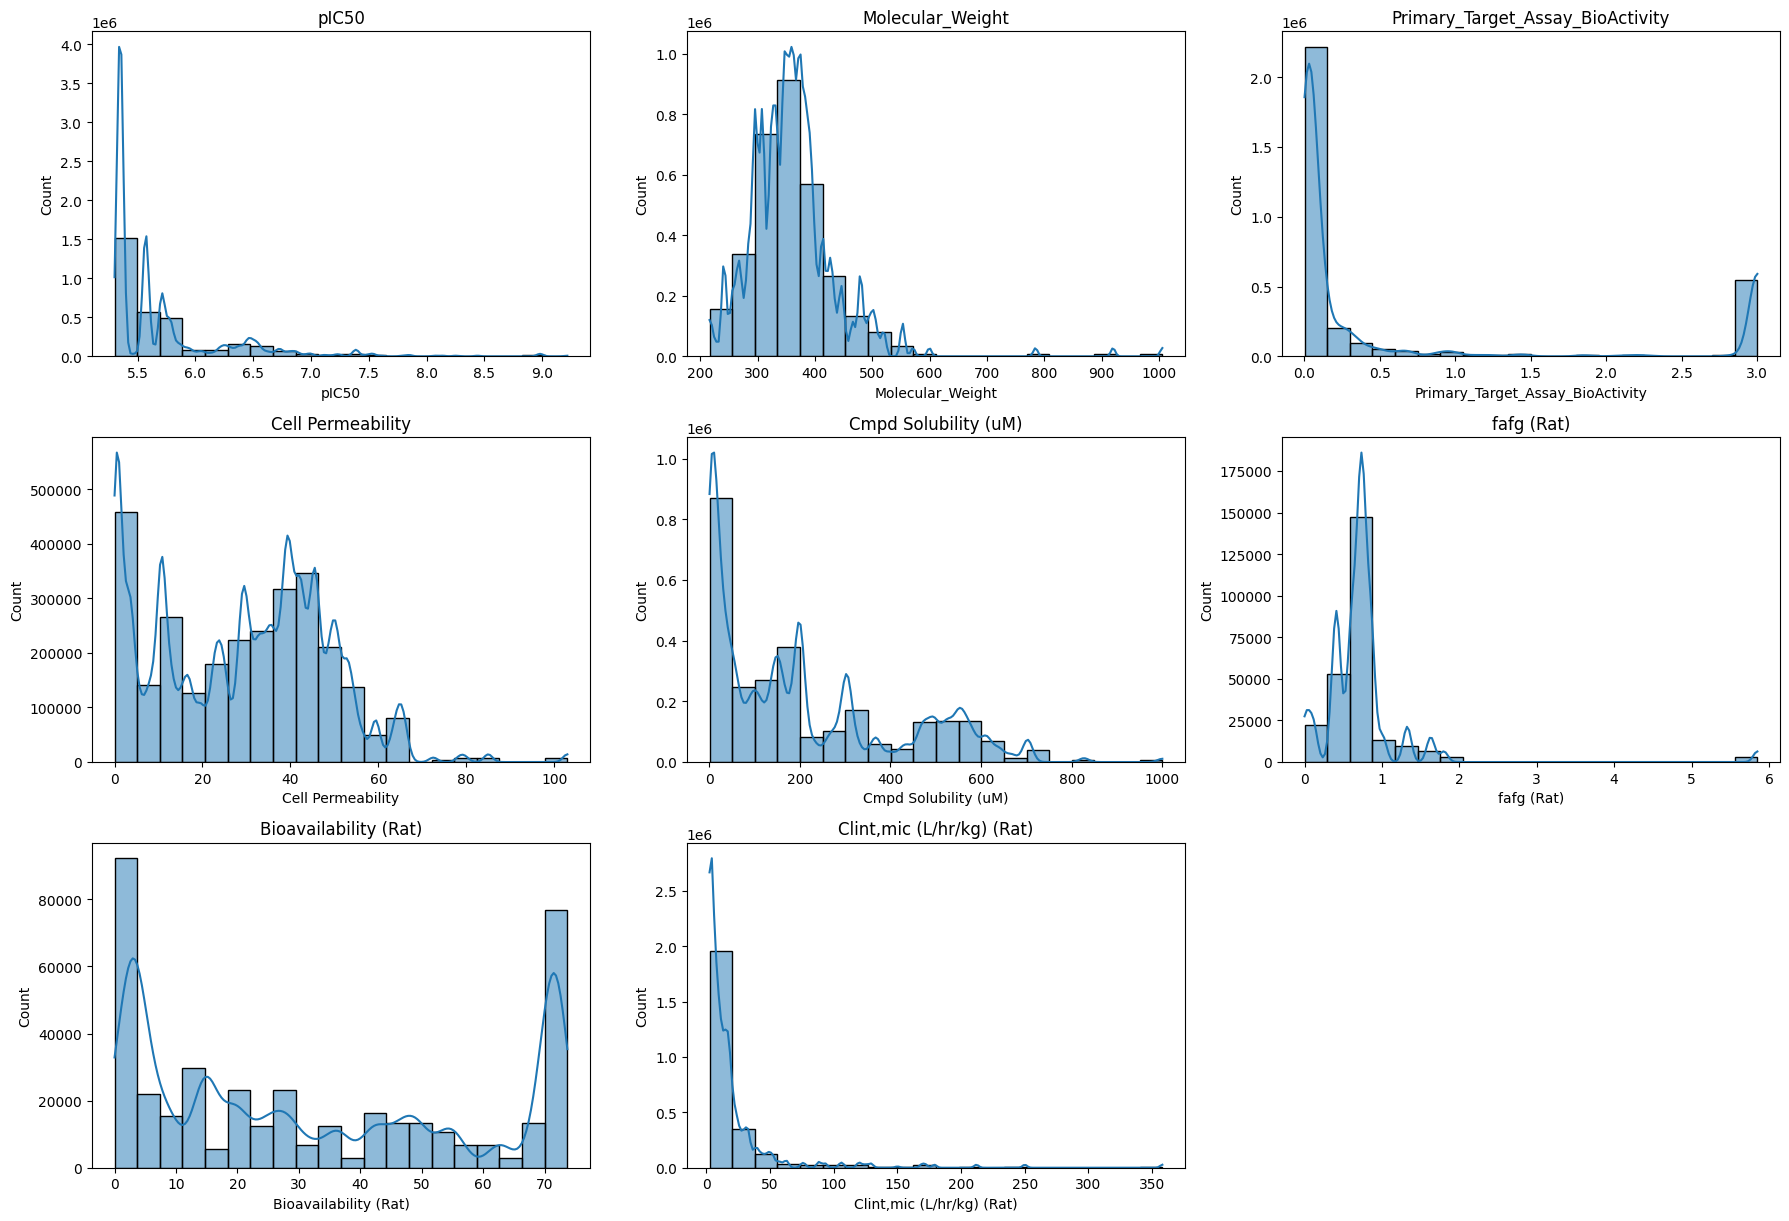

In [15]:
selected_columns = [
# Plotting the distributions of numerical variables
    'pIC50',
    'Molecular_Weight',
    'Primary_Target_Assay_BioActivity',
    'Cell Permeability',
    'Cmpd Solubility (uM)',
    'fafg (Rat)',
    'Bioavailability (Rat)',
    'Clint,mic (L/hr/kg) (Rat)'
]

# Function to create histograms with refined bin sizes
def plot_histograms_with_bins(data, columns):

    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        # Plot histogram with refined bin sizes
        sns.histplot(data[col].dropna(), kde=True, ax=ax, bins=20)
        ax.set_title(col)

        # Label axes
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

    # Removing any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Calling the function
plot_histograms_with_bins(final_merged_data, selected_columns)


**Applying Log Transformation**

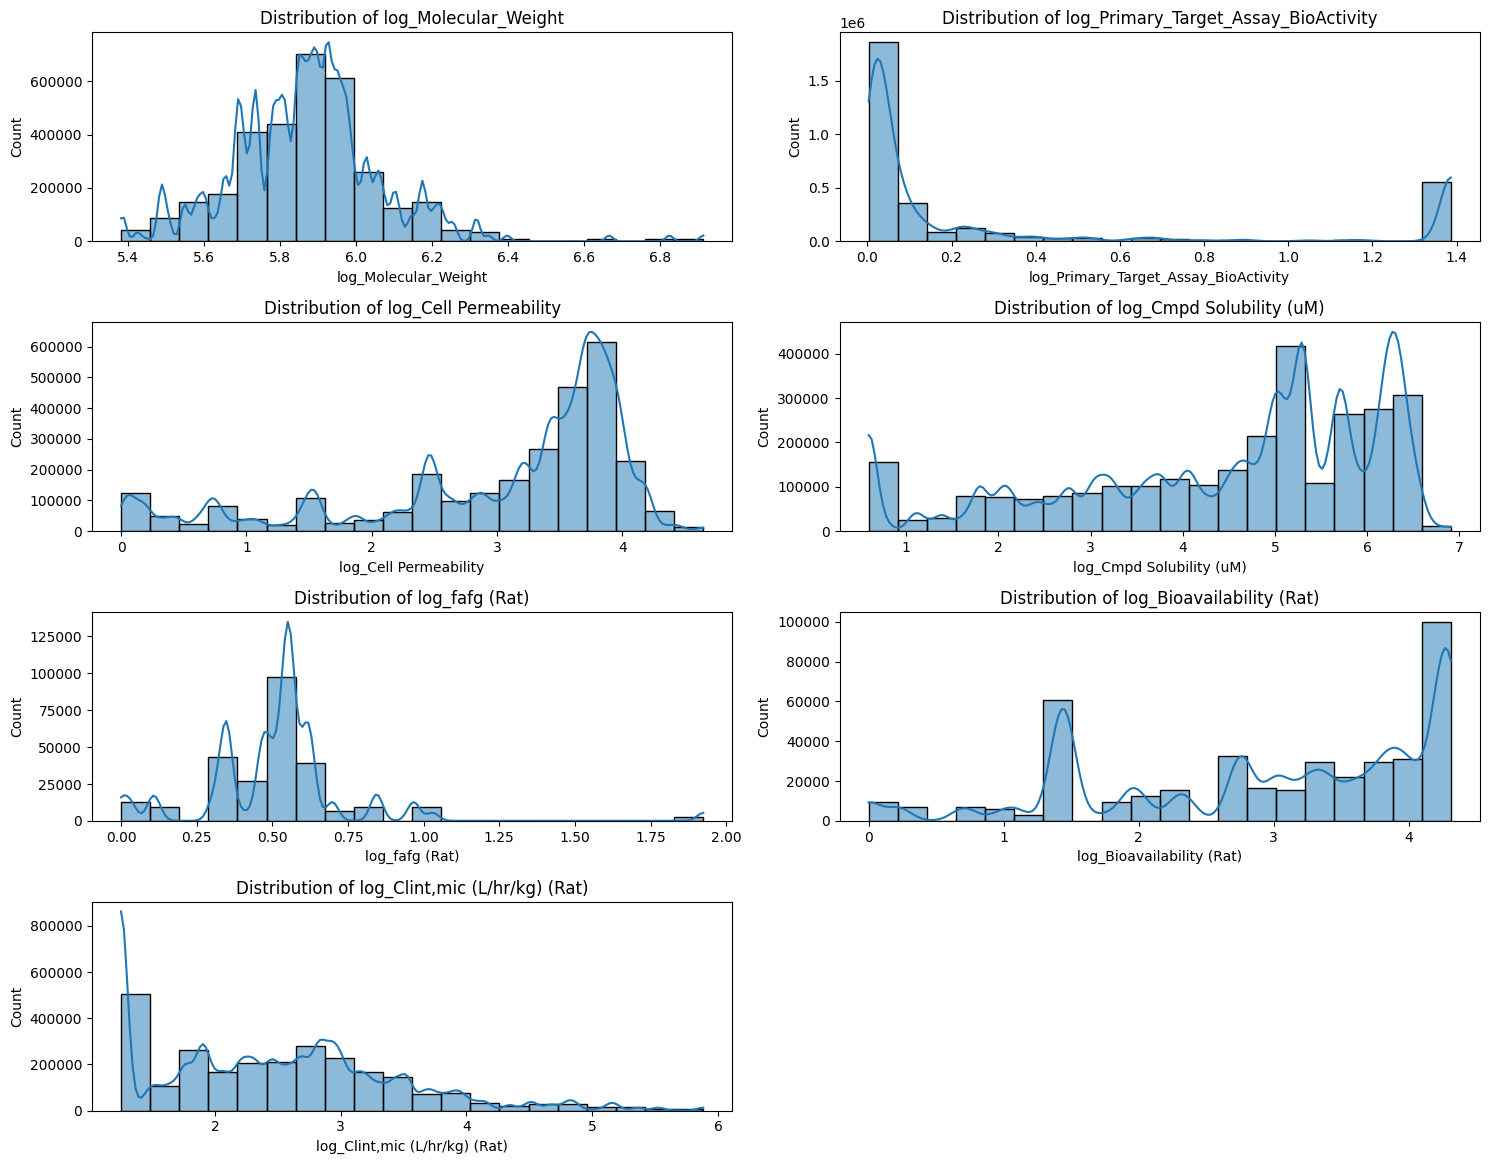

In [16]:
# Apply log transformation to skewed variables
columns_to_log_transform = [
    'Molecular_Weight',
    'Primary_Target_Assay_BioActivity',
    'Cell Permeability',
    'Cmpd Solubility (uM)',
    'fafg (Rat)',
    'Bioavailability (Rat)',
    'Clint,mic (L/hr/kg) (Rat)'
]

# Apply log1p (log(1 + x)) to handle zeros and negative values if any
for column in columns_to_log_transform:
    final_merged_data[f'log_{column}'] = np.log1p(final_merged_data[column])

# Plot the distributions of log-transformed variables
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_log_transform, 1):
    plt.subplot(7, 2, i)
    sns.histplot(final_merged_data[f'log_{column}'].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of log_{column}')
plt.tight_layout()
plt.show()


In [17]:
# Dropping the redundant columns
cleaned_merged_data = final_merged_data.drop(columns=[
    'Molecular_Weight',
    'Primary_Target_Assay_BioActivity',
    'Cell Permeability',
    'Cmpd Solubility (uM)',
    'fafg (Rat)',
    'Bioavailability (Rat)',
    'Clint,mic (L/hr/kg) (Rat)'
])

In [18]:
cleaned_merged_data.shape

(3250496, 23)

In [19]:
cleaned_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250496 entries, 1492848 to 6725195
Data columns (total 23 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   CompoundID                            object 
 1   GeneSymbol                            object 
 2   pIC50                                 float64
 3   TPSA                                  float64
 4   ClogP                                 float64
 5   LogD                                  float64
 6   Num_H_Donors                          int64  
 7   Num_H_Acceptors                       int64  
 8   Num_AromaticRings                     float64
 9   F_SP3                                 float64
 10  Drug_Class                            object 
 11  Ensembl ID                            object 
 12  EntrezGene                            float64
 13  ae                                    object 
 14  drugs_with_ae                         int64  
 15  bioactive

**Handling Missing Values**

In [20]:
# Checking for missing values in the dataset

print("\nMissing values in Dataset:")
cleaned_merged_data.isnull().sum()



Missing values in Dataset:


CompoundID                                    0
GeneSymbol                                    0
pIC50                                         0
TPSA                                          0
ClogP                                         0
LogD                                       2848
Num_H_Donors                                  0
Num_H_Acceptors                               0
Num_AromaticRings                             0
F_SP3                                         0
Drug_Class                               357008
Ensembl ID                                    0
EntrezGene                                    0
ae                                            0
drugs_with_ae                                 0
bioactive_drugs                               0
log_Molecular_Weight                          0
log_Primary_Target_Assay_BioActivity          0
log_Cell Permeability                    448960
log_Cmpd Solubility (uM)                 483680
log_fafg (Rat)                          

In [21]:
# Handling missing values

# For the remaining missing values, use mean/mode imputation based on the column type
# Mean imputation for numerical columns
for col in [ 
    'LogD', 
    'log_Cell Permeability',
    'log_Cmpd Solubility (uM)',
    'log_fafg (Rat)',
    'log_Bioavailability (Rat)',
    'log_Clint,mic (L/hr/kg) (Rat)']:
    cleaned_merged_data[col].fillna(cleaned_merged_data[col].mean(), inplace=True)

# Mode imputation for categorical columns
for col in ['Drug_Class']:
   cleaned_merged_data[col].fillna(cleaned_merged_data[col].mode()[0], inplace=True)



In [22]:
# Verifying there are no longer missing values

print("\nMissing values in Dataset:")
cleaned_merged_data.isnull().sum()



Missing values in Dataset:


CompoundID                              0
GeneSymbol                              0
pIC50                                   0
TPSA                                    0
ClogP                                   0
LogD                                    0
Num_H_Donors                            0
Num_H_Acceptors                         0
Num_AromaticRings                       0
F_SP3                                   0
Drug_Class                              0
Ensembl ID                              0
EntrezGene                              0
ae                                      0
drugs_with_ae                           0
bioactive_drugs                         0
log_Molecular_Weight                    0
log_Primary_Target_Assay_BioActivity    0
log_Cell Permeability                   0
log_Cmpd Solubility (uM)                0
log_fafg (Rat)                          0
log_Bioavailability (Rat)               0
log_Clint,mic (L/hr/kg) (Rat)           0
dtype: int64

**Standardization & Harmonization of Variable Names To Ensure Consistency Across the Dataset**

In [23]:
 # Standardizing column names for consistency

cleaned_merged_data.rename(columns={
    'GeneSymbol': 'Gene_Symbol', 'EntrezGene': 'Entrez_Gene',
    'ae': 'Adverse_Event', 'Ensembl ID': 'Ensembl_ID',
    'log_Primary_Target_Assay_BioActivity': 'log_Primary_BioActivity',
    'Num_H_Donors': 'Num_Hydrogen_Donors',
    'Num_H_Acceptors': 'Num_Hydrogen_Acceptors',
    'Num_AromaticRings': 'Num_Aromatic_Rings',
    'F_SP3': 'Fraction_SP3',
    'log_Cell Permeability': 'log_Cell_Permeability',
    'log_Cmpd Solubility (uM)': 'log_Compound_Solubility_uM',
    'log_fafg (Rat)': 'log_Fafg_Rat',
    'log_Bioavailability (Rat)': 'log_Bioavailability_Rat',
    'log_Clint,mic (L/hr/kg) (Rat)': 'log_Clint_Rat_L_hr_kg'
}, inplace=True)

cleaned_merged_data.columns = cleaned_merged_data.columns.str.lower()


# Checking the updated column names
print("\nColumn Names in Merged Dataset:")
cleaned_merged_data.columns




Column Names in Merged Dataset:


Index(['compoundid', 'gene_symbol', 'pic50', 'tpsa', 'clogp', 'logd',
       'num_hydrogen_donors', 'num_hydrogen_acceptors', 'num_aromatic_rings',
       'fraction_sp3', 'drug_class', 'ensembl_id', 'entrez_gene',
       'adverse_event', 'drugs_with_ae', 'bioactive_drugs',
       'log_molecular_weight', 'log_primary_bioactivity',
       'log_cell_permeability', 'log_compound_solubility_um', 'log_fafg_rat',
       'log_bioavailability_rat', 'log_clint_rat_l_hr_kg'],
      dtype='object')

**Feature Selection And  Engineering**

In [24]:
# Define the categories and associated keywords
categories = {
    "Cardiovascular": ["chest", "heart", "cardiac", "hypertension", "blood pressure", "tachycardia", "bradycardia", "arrhythmia", "myocardial", "infarction", "angina", "stroke", "atherosclerosis", "heart failure", "cardiomyopathy", "ischemia", "palpitations", "vascular", "hypertensive", "coronary", "thrombosis", "embolism"],
    "Gastrointestinal": ["stomach", "abdominal", "vomit", "nausea", "diarrhea", "constipation", "gastro", "colitis", "gastritis", "ulcer", "reflux", "esophagitis", "irritable bowel", "crohn", "celiac", "bloating", "intestinal", "digestive", "pancreatitis", "hepatobiliary"],
    "Neurological": ["headache", "migraine", "dizziness", "seizure", "neuropathy", "tremor", "neurological"],
    "Dermatological": ["rash", "skin", "dermatitis", "eczema", "psoriasis", "dermato"],
    "Haematological": ["anemia", "leukopenia", "thrombocytopenia", "blood", "haemato", "haemo", "hemo"],
    "Renal": ["kidney", "renal", "nephro", "nephritis", "nephropathy", "glomerulonephritis", "renal failure", "dialysis", "uremia", "creatinine", "proteinuria", "hematuria", "pyelonephritis", "renal calculi", "kidney stones", "glomerular", "tubular"],
    "Respiratory": ["lung", "asthma", "respiratory", "bronchitis"],
    "Musculoskeletal": ["muscle", "bone", "arthritis", "myalgia", "osteoporosis", "musculoskeletal"],
    "Endocrinology": ["diabetes", "thyroid", "endocrine", "hormone"],
    "Hepatology": ["liver", "hepato", "hepatitis", "cirrhosis", "hepatocellular", "jaundice", "liver failure", "fibrosis", "steatosis", "hepatomegaly", "bilirubin", "hepatotoxicity", "cholestasis", "portal hypertension", "ascites", "hepatic", "transaminase"],
    "General": ["pain", "fatigue", "fever", "weakness", "general"],
    "Urology": ["urine", "urinary", "urology", "bladder"],
    "Reproductive": ["pregnancy", "fertility", "reproductive"],
    "Immunological": ["allergy", "immune", "cytokine", "hypersensitivity"],
    "Oncology": ["cancer", "tumor", "neoplasm", "carcinoma", "sarcoma", "leukemia", "lymphoma", "melanoma", "oncology", "metastasis", "chemotherapy", "radiotherapy", "immunotherapy", "biopsy", "oncogene", "cytotoxic", "adenocarcinoma"],
    "Psychological": ["anxiety", "depression", "suicidial", "ptsd", "bipolar", "psycho", "mood", "sleep", "insomnia", "food"]
}

# Function to map adverse events to categories
def map_adverse_event_to_category(adverse_event, categories):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in adverse_event.lower():
                return category
    return "Other"  # Return "Other" if no category matches

# Apply the mapping function to the adverse event column
cleaned_merged_data['adverse_event_category'] = cleaned_merged_data['adverse_event'].apply(lambda x: map_adverse_event_to_category(x, categories))

# Display the first few rows of the updated dataframe
cleaned_merged_data.head()



,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,drugs_with_ae,bioactive_drugs,log_molecular_weight,log_primary_bioactivity,log_cell_permeability,log_compound_solubility_um,log_fafg_rat,log_bioavailability_rat,log_clint_rat_l_hr_kg,adverse_event_category
1492848,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,151,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Haematological
1492849,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,1991,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Gastrointestinal
1492850,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,115,151,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Gastrointestinal
1492851,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,268,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Other
1492852,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,1647,8,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Psychological


In [25]:
# Encoding categorical data
cleaned_merged_data["adverse_event_category_encoded"] = cleaned_merged_data["adverse_event_category"].astype('category').cat.codes
cleaned_merged_data.head()


,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,bioactive_drugs,log_molecular_weight,log_primary_bioactivity,log_cell_permeability,log_compound_solubility_um,log_fafg_rat,log_bioavailability_rat,log_clint_rat_l_hr_kg,adverse_event_category,adverse_event_category_encoded
1492848,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Haematological,5
1492849,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Gastrointestinal,3
1492850,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,151,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Gastrointestinal,3
1492851,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Other,11
1492852,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,8,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Psychological,12


In [26]:
cleaned_merged_data.shape

(3250496, 25)

**Handling Duplicated Values**

In [27]:
#  Checking for duplicated values
duplicate_sum = cleaned_merged_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')


Duplicates Rows in Dataset are : 320480


In [28]:
# Removing duplicates in the dataset

duplicated = cleaned_merged_data[cleaned_merged_data.duplicated(keep=False)]
cleaned_merged_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_merged_data.shape[0], cleaned_merged_data.shape[1]))
duplicated.head()


Total 2930016 datapoints remaining with 25 features


,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,bioactive_drugs,log_molecular_weight,log_primary_bioactivity,log_cell_permeability,log_compound_solubility_um,log_fafg_rat,log_bioavailability_rat,log_clint_rat_l_hr_kg,adverse_event_category,adverse_event_category_encoded
1527840,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,21,5.490135,0.239804,4.099332,5.303305,0.51609,2.972508,1.877937,Haematological,5
1527841,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,21,5.490135,0.239804,4.099332,5.303305,0.51609,2.972508,1.877937,Gastrointestinal,3
1527842,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,151,5.490135,0.239804,4.099332,5.303305,0.51609,2.972508,1.877937,Gastrointestinal,3
1527843,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,21,5.490135,0.239804,4.099332,5.303305,0.51609,2.972508,1.877937,Other,11
1527844,CM-1116691,EGFR,5.35,58.87,1.314,1.3136,1,5,3.0,0.46154,...,8,5.490135,0.239804,4.099332,5.303305,0.51609,2.972508,1.877937,Psychological,12


In [29]:
# Confirming there are no longer duplicated values

duplicate_sum = cleaned_merged_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')


Dataset contains no Duplicate Values


In [30]:
processed_dataset = cleaned_merged_data.to_csv('processed_dataset.csv', index=None)

In [31]:
cleaned_merged_data.columns

Index(['compoundid', 'gene_symbol', 'pic50', 'tpsa', 'clogp', 'logd',
       'num_hydrogen_donors', 'num_hydrogen_acceptors', 'num_aromatic_rings',
       'fraction_sp3', 'drug_class', 'ensembl_id', 'entrez_gene',
       'adverse_event', 'drugs_with_ae', 'bioactive_drugs',
       'log_molecular_weight', 'log_primary_bioactivity',
       'log_cell_permeability', 'log_compound_solubility_um', 'log_fafg_rat',
       'log_bioavailability_rat', 'log_clint_rat_l_hr_kg',
       'adverse_event_category', 'adverse_event_category_encoded'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS


**Overview of the Dataset**


**Variables of Interest:**

*   **Compound ID**: A unique code given to a specific chemical compound or drug being studied.
*   **Adverse Event**: Any unwanted or harmful effect after taking a drug or compound.
*   **Adverse Event Category**: Groups the adverse events into larger categories based on the system they affect in the body.
*   **Adverse Event Category Encoded**: A number assigned to each adverse event category to make it easier to analyze.
*   **Bioavailability**: The proportion of a compound that reaches the bloodstream after it is introduced into the body.
*   **Fractional Absorption**: The percentage of a compound absorbed into the bloodstream.
*   **Intrinsic Clearance (L/Hr/kg)**: The rate at which a compound is broken down and eliminated from the body by the liver.
*   **Compound Solubility (uM)**: A measure of how much a compound can dissolve in a given solvent.
*   **pIC50**: A measure of the potency of a compound.
*   **Primary Bioactivity**: A measure of the overall biological effect of a compound on its intended biological target.
*  **Molecular Weight**: The total weight of a compound molecule.

In [32]:
cleaned_merged_data.shape

(2930016, 25)

In [33]:
# Overview of the dataset
cleaned_merged_data.head()

,compoundid,gene_symbol,pic50,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,...,bioactive_drugs,log_molecular_weight,log_primary_bioactivity,log_cell_permeability,log_compound_solubility_um,log_fafg_rat,log_bioavailability_rat,log_clint_rat_l_hr_kg,adverse_event_category,adverse_event_category_encoded
1492848,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Haematological,5
1492849,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Gastrointestinal,3
1492850,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,151,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Gastrointestinal,3
1492851,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,21,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Other,11
1492852,CM-212452,EGFR,5.35,93.35,2.482,2.4436,3,5,2.0,0.05882,...,8,5.687992,1.386294,3.001378,4.482434,0.51609,2.972508,2.491361,Psychological,12


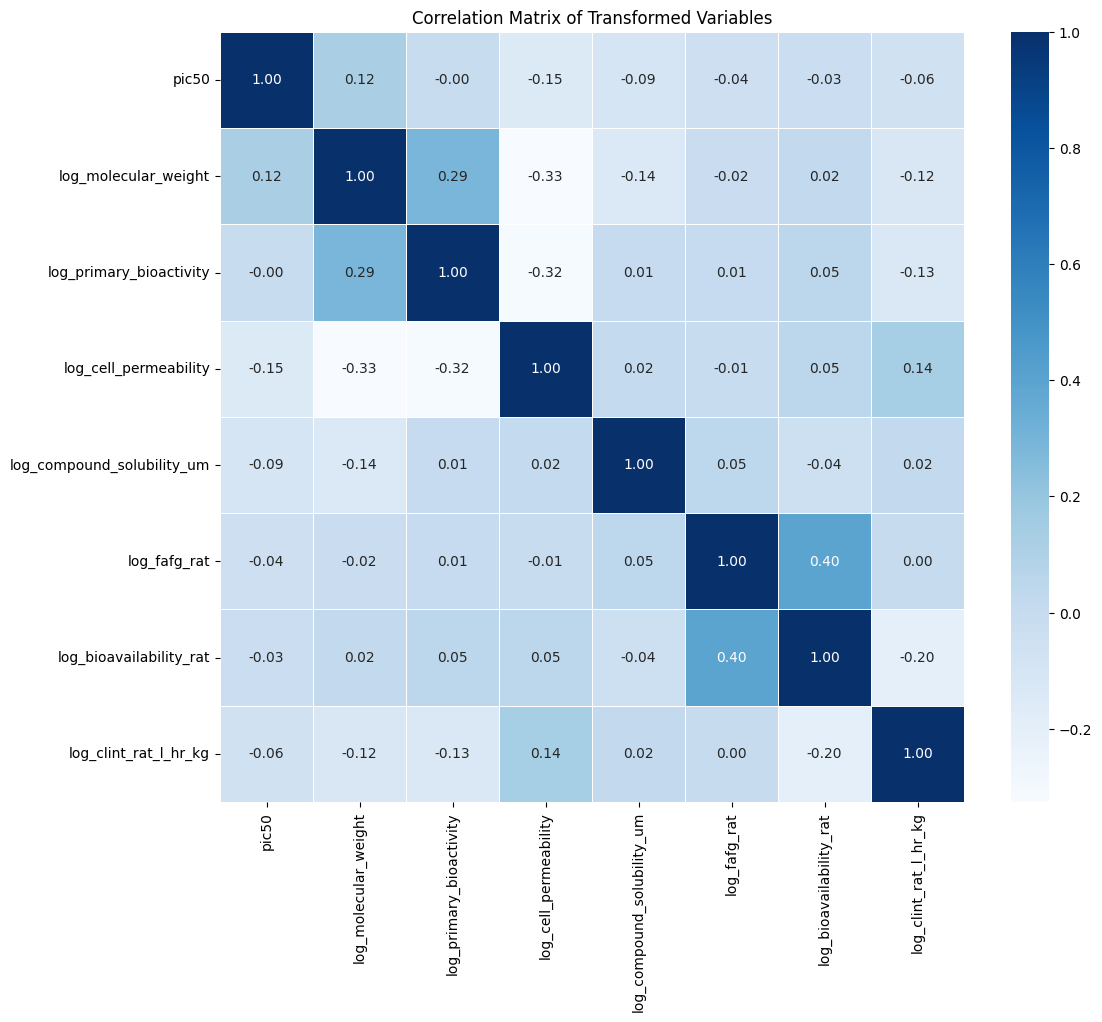

In [34]:
# Selecting relevant columns for correlation analysis
correlation_columns = [
    'pic50', 'log_molecular_weight', 
    'log_primary_bioactivity', 'log_cell_permeability',
    'log_compound_solubility_um', 'log_fafg_rat', 
    'log_bioavailability_rat','log_clint_rat_l_hr_kg'
]

# Computing the correlation matrix
correlation_matrix = cleaned_merged_data[correlation_columns].corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Creating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Transformed Variables')
plt.show()


In [35]:
# Determining Compound distribution
cleaned_merged_data['compoundid'].describe()


count        2930016
unique           485
top       CM-1771635
freq           26944
Name: compoundid, dtype: object

In [36]:
# Determining Adverse Event Category distribution
cleaned_merged_data['adverse_event_category'].value_counts()

Other               1892466
Haematological       163296
Cardiovascular       152802
Gastrointestinal     113982
Dermatological       101154
Hepatology            86628
Respiratory           58806
General               58704
Musculoskeletal       57924
Oncology              57288
Renal                 51012
Psychological         35214
Neurological          26874
Endocrinology         22854
Immunological         20700
Urology               20442
Reproductive           9870
Name: adverse_event_category, dtype: int64

# DATA ANALYSIS AND VISUALIZATION

**Relationship Between Physicochemical Properties vs Clearance**

Physicochemical properties: log_molecular_weight

Clearance: log_clint_rat_l_hr_kg


**Correlation Matrix**

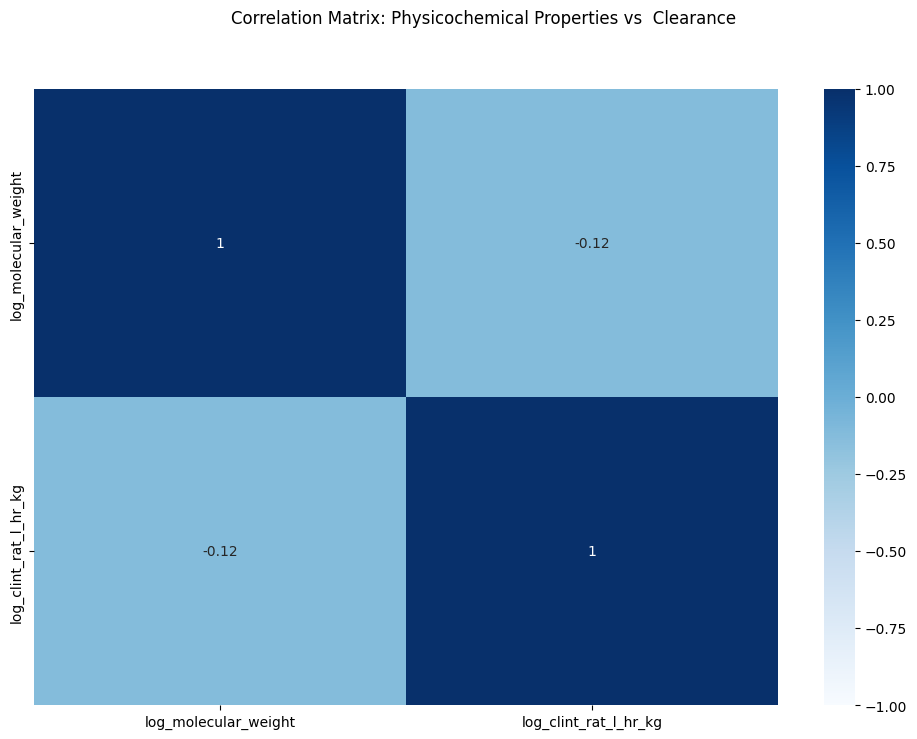

In [37]:
# Selecting relevant columns

selected_columns = [
    'log_molecular_weight',
    'log_clint_rat_l_hr_kg'
]

data_physico_cl = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_physico_cl.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.suptitle('Correlation Matrix: Physicochemical Properties vs  Clearance')
plt.show()



**Relationship Between Primary Potency and Selectivity (Off-Target Bioactivity)**

Primary Potency: pic50

Selectivity (off-target bioactivity): primary_bioactivity

**Correlation Matrix**

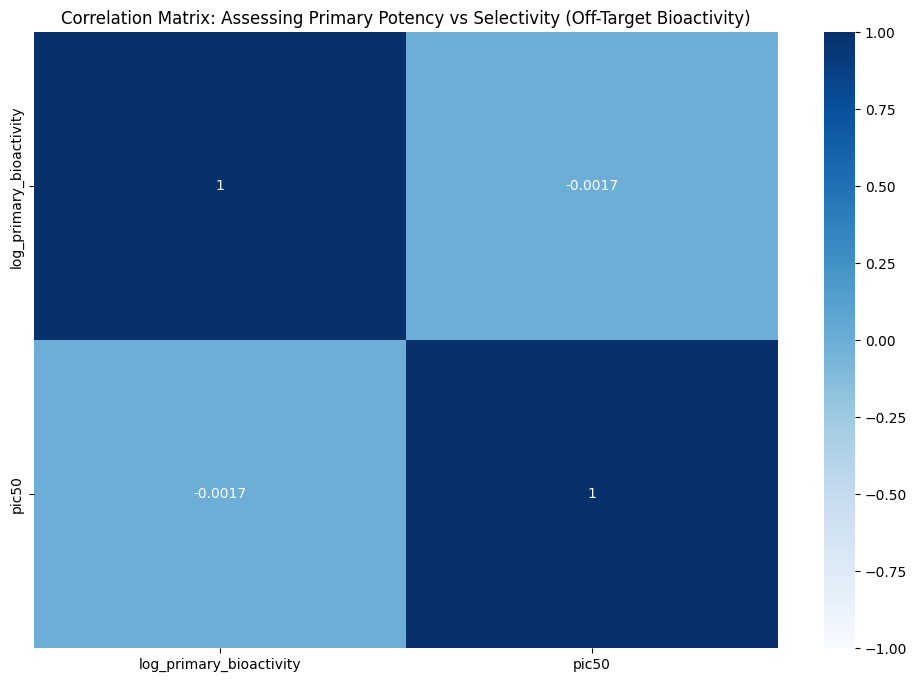

In [38]:

# Selecting relevant columns
columns = ['log_primary_bioactivity', 'pic50']
data_pry_pot_off = cleaned_merged_data[columns]

# Calculate the correlation matrix
correlation_matrix = data_pry_pot_off.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Assessing Primary Potency vs Selectivity (Off-Target Bioactivity)')
plt.show()


**Relationship Between Selectivity and Adverse Events**

Selectivity: pic50

Adverse Event: adverse_event_category_encoded

**Correlation Matrix**

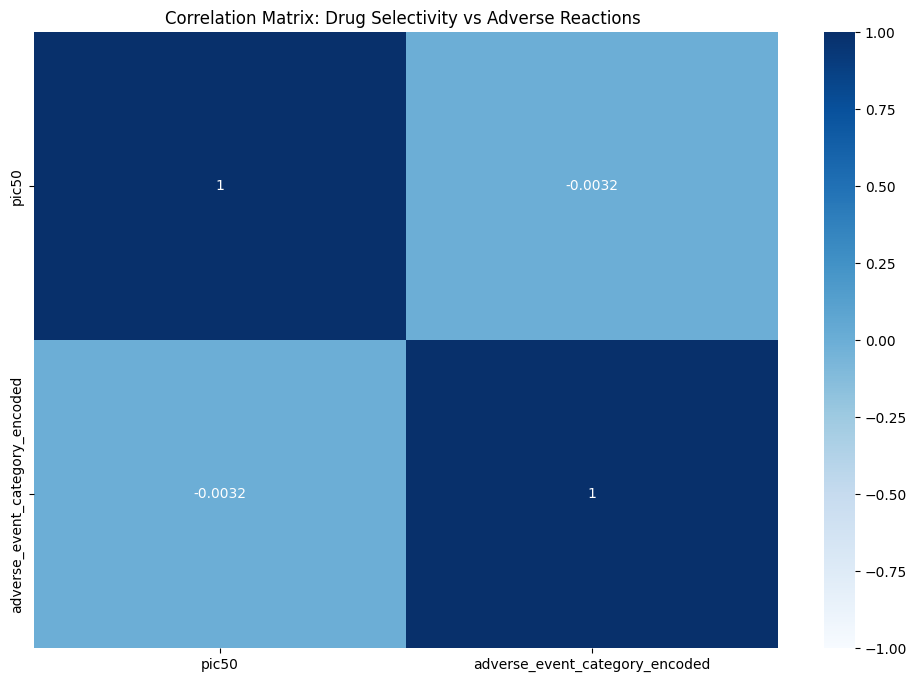

In [39]:
# Selecting relevant columns
columns = ['pic50', 'adverse_event_category_encoded']
data_pry_sel_ae = cleaned_merged_data[columns]

# Calculate the correlation matrix
correlation_matrix = data_pry_sel_ae.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Drug Selectivity vs Adverse Reactions ')
plt.show()


**Relationship Between In Vitro and In Vivo Properties**

In Vitro Properties: log_primary_bioactivity, pic50, log_compound_solubility_um, log_molecular_weight, etc

In Vivo Properties: log_clint_rat_l_hr_kg, log_bioavailability_rat, log_fafg_rat, adverse_event_category_encoded, etc

**Correlation Matrix**

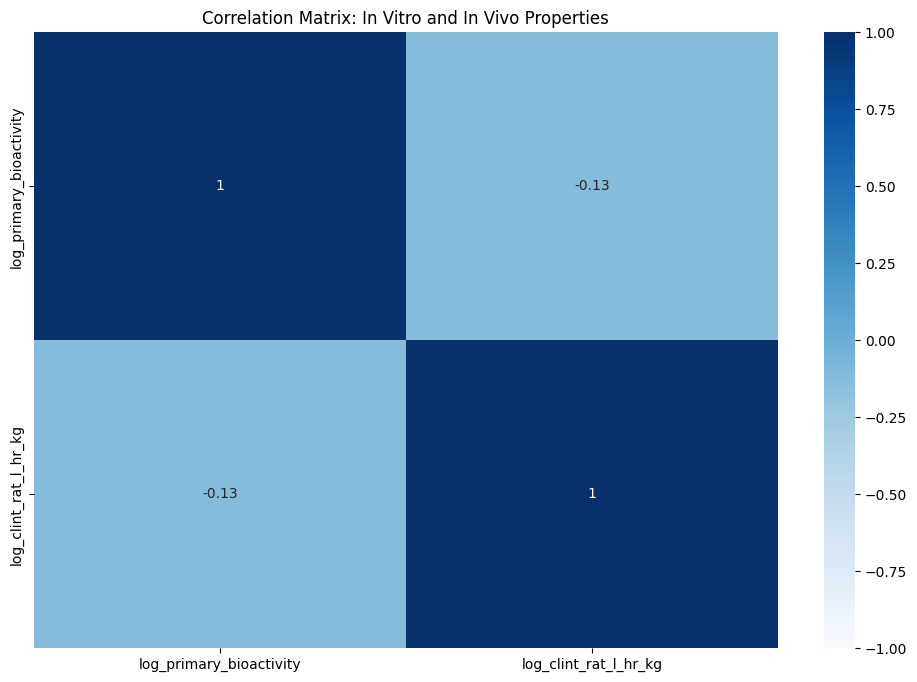

In [40]:
# Selecting relevant columns

selected_columns = ['log_primary_bioactivity', 'log_clint_rat_l_hr_kg']
data_vivo_vitro = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_vivo_vitro.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: In Vitro and In Vivo Properties')
plt.show()



**Data Relationships for Absorption Rate**

Physicochemical properties: log_molecular_weight, log_compound_solubility_um

Fractional Absorption: log_fafg_rat

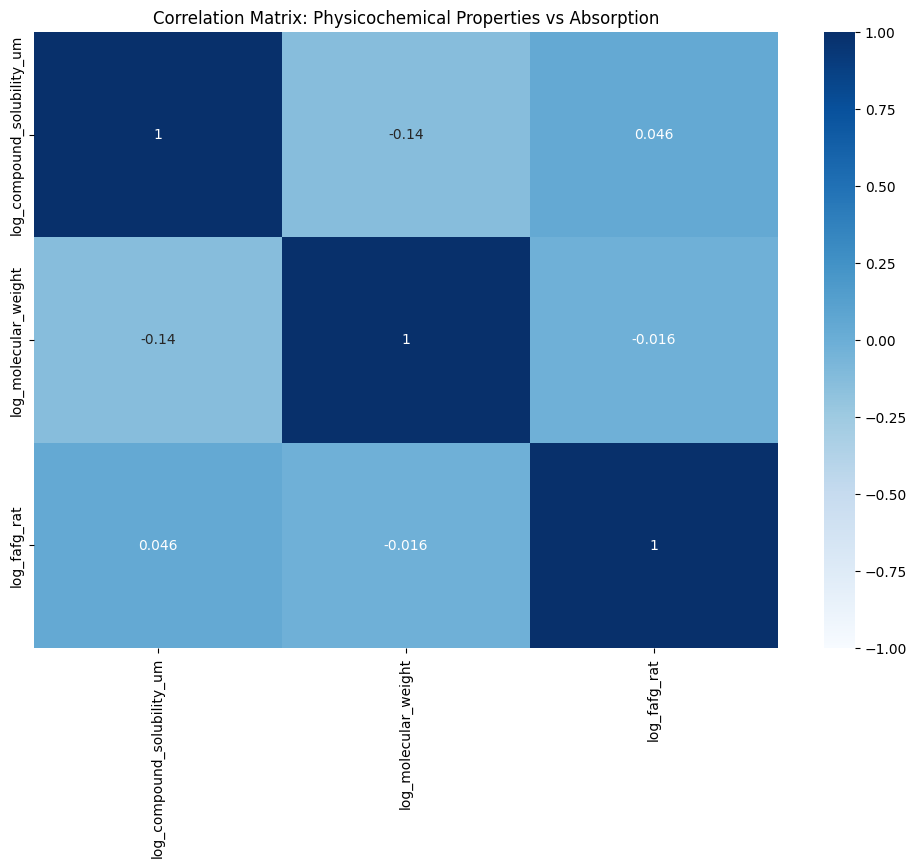

In [41]:
# Selecting relevant columns

selected_columns = ['log_compound_solubility_um', 'log_molecular_weight', 'log_fafg_rat']
data_absorption = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_absorption.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Physicochemical Properties vs Absorption')
plt.xticks(rotation='vertical')
plt.show()



In [42]:
cleaned_merged_data.shape

(2930016, 25)